In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from script import FrankeFunction

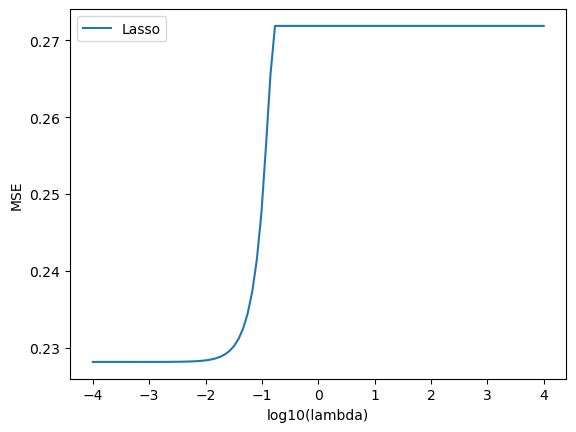

In [4]:
## WEEK 36 example WITH LASSO REGRESSION ##
# Franke function
from sklearn import linear_model

# Generate data
np.random.seed(42)
n = 100
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
noise = 0.1*np.random.normal(0, 1, n)
Z = FrankeFunction(x, y) + noise

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x.reshape(-1,1))
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

x_combined = np.hstack((x_scaled, y_scaled))

# Split the data into training and test data
x_train, x_test, z_train, z_test = train_test_split(x_combined, Z, test_size=0.2)


degrees = range(1,6)

mse_lasso_values = np.zeros(n)
lambdas = np.logspace(-4,4, n)

for i in range(n):
    lmb = lambdas[i]
    lasso = linear_model.Lasso(lmb, fit_intercept=False)
    lasso.fit(x_train, z_train)
    y_pred_lasso = lasso.predict(x_train)
    mse_lasso_values[i] = mean_squared_error(z_train, y_pred_lasso)

plt.figure()
plt.plot(np.log10(lambdas), mse_lasso_values, label='Lasso')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()